# Primeiro programa usando TensorFlow
[Aqui](https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/) você encontrará o mesmo projeto e seu autor original.

Esta rede neural identificará dígitos escritos cursivamente. Os dados de treinamento provêm do banco de dados [MNIST](http://yann.lecun.com/exdb/mnist/), que abriga 70.000 exemplos de imagens classfificados corretamente. Apesar de podermos fazer o download no link anterior, há um forma mais fácil de trabalharmos com ele. Devido a fama do MNIST, a biblioteca Keras traz uma função que baixa os dados.

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
print('Versão do TensorFlow: '+tf.__version__)

Versão do TensorFlow: 1.10.0


OBS.: para imprimir em escalas de cinza, temos que passar um novo argumento ao `imshow()`.

A lista `y_teste` contém os rótulos de cada dado em x_treino

## Baixando os dados
A função `load_data()` faz download das imagens e seus rótulos. Depois retorna duas tuplas contendo duas listas cada uma. Os nomes das variáveis são auto-explicativos.

Tamanho da lista de treinamento: 60000
Tamanho da lista de validação: 10000


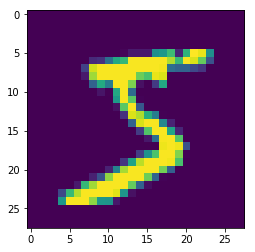

In [22]:
mnist = tf.keras.datasets.mnist
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()
print('Tamanho da lista de treinamento: '+str(len(x_treino)))
print('Tamanho da lista de validação: '+str(len(x_teste)))
plt.imshow(x_treino[0])
plt.show()

OBS.: Todas as imagens aqui têm dimensões 28x28.

A lista `y_treino` armazena o rótulo de cada dado em `x_treino`. O mesmo ocorre nas listas de teste.

In [24]:
print('Rótulo da imagem acima (x_treino[0]): '+str(y_treino[0]))

Rótulo da imagem acima (x_treino[0]): 5


## Pré-processamento
Em nosso conjunto de dados, todas imagens monocromáticas usam valores no intervalo $[0, 255] \in Z$ para representar as 256 tons de uma cor. Vamos normalizar esses valores para $[0,1] \in R$.

In [25]:
x_treino = tf.keras.utils.normalize(x_treino, axis=1)
x_teste = tf.keras.utils.normalize(x_teste, axis=1)

Para demonstrar que a imagem permanece igual, vamos imprimi-la. Com a adição de um novo argumento no `imshow()`, veremos ela em escala de cinza.

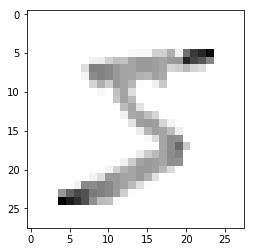

In [26]:
plt.imshow(x_treino[0], cmap=plt.cm.binary)
plt.show()

## Costruindo o modelo da rede neural
Na biblioteca Keras, as redes são objetos chamados de **modelos**. O modelo que queremos construir é chamada de [Multilayer Perceptron](https://juliocprocha.files.wordpress.com/2017/11/imagem_1.jpg) nos artigos, mas no código é denominada `Sequential()`. Por isso temos:

In [28]:
model = tf.keras.models.Sequential()

Vamos criar uma camada com a função `add()`. Visto que esta é a primeira, o Keras já sabe que ela é a entrada da rede e não são neurônios. Por isso, não há necessidade de especificar nada sobre quantidade, função ativadora, etc.

O que faremos por agora é "alertar" ao modelo que a entrada deve ser transformada numa lista unidimencional. A matriz 28x28 será redimensionada para um vetor 1x784.

In [30]:
model.add(tf.keras.layers.Flatten())

Criando outra camada com 128 neurônios com função de ativação `ReLU()`. 
$$
ReLU(x) = max(0, x)
$$

In [ ]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Última camada terá invariavelmente 10 neurônios, cada um representando um dos 10 algarismos arábicos.

A próxima função de ativação é bem comum na última camada de redes neurais.

In [ ]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

Usar a **Softmax** como função de ativação faz com que os valores resultantes em cada neurônio seja na verdade a probabilidade da entrada pertencer a classe que ele representa. A softmax transforma as saídas de cada classe para valores entre 0 e 1 e também divide pela soma das saídas.

$$
\sigma(z)_j = \dfrac{e^{z_ j}}{\sum_{k=1}^{K}e^{z_ k}}
$$
$z$ é o valor no neurônio antes da ativação

$j$ é o índice do neurônio de saída

$k$ é o índice de todos os neurônios em um nível

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ola maria

In [34]:
model.fit(x_treino, y_treino, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 76us/step - loss: 19.8234 - acc: 0.0000e+00
Epoch 2/3
60000/60000 [==============================] - 4s 74us/step - loss: 19.8234 - acc: 0.0000e+00
Epoch 3/3
60000/60000 [==============================] - 4s 74us/step - loss: 19.8234 - acc: 0.0000e+00
